<a href="https://colab.research.google.com/github/Sudhaganisrinidhi/srinidhi/blob/main/Adn_Lab_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Study Hours (X)     Scores (Y)
------------------------------
1                   10
2                   15
3                   20
4                   25
5                   30
6                   35
7                   40
8                   45
9                   50
10                  55


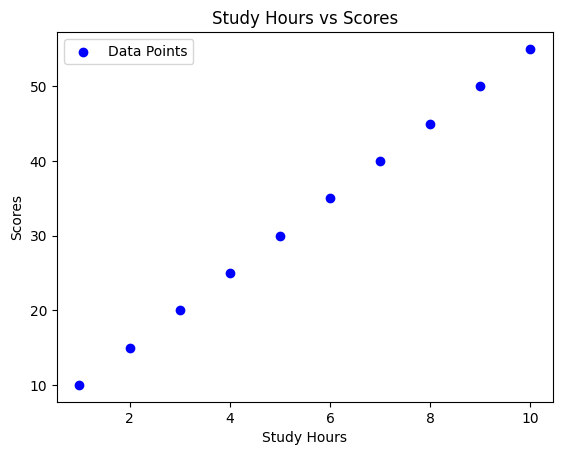

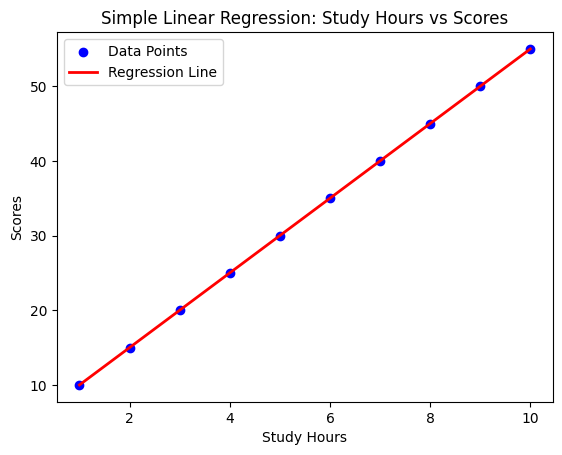

Mean Squared Error (MSE): 2.0510383535746307e-29
R-squared: 1.0


In [12]:
# Step 1: Create the dataset (Study Hours vs Scores)
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])  # Study hours (X)
Y = np.array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55])  # Scores (Y)

# Step 2: Print the dataset in tabular format
print(f"{'Study Hours (X)':<20}{'Scores (Y)'}")
print("-" * 30)
for x, y in zip(X.flatten(), Y):
    print(f"{x:<20}{y}")

# Step 3: Visualize the dataset (optional)
plt.scatter(X, Y, color="blue", label="Data Points")
plt.xlabel("Study Hours")
plt.ylabel("Scores")
plt.title("Study Hours vs Scores")
plt.legend()
plt.show()

# Step 4: Train the Simple Linear Regression model
model = LinearRegression()
model.fit(X, Y)

# Step 5: Make predictions
Y_pred = model.predict(X)

# Step 6: Visualize the regression line
plt.scatter(X, Y, color="blue", label="Data Points")
plt.plot(X, Y_pred, color="red", linewidth=2, label="Regression Line")
plt.xlabel("Study Hours")
plt.ylabel("Scores")
plt.title("Simple Linear Regression: Study Hours vs Scores")
plt.legend()
plt.show()

# Step 7: Evaluate the model
mse = mean_squared_error(Y, Y_pred)
r2 = r2_score(Y, Y_pred)

# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

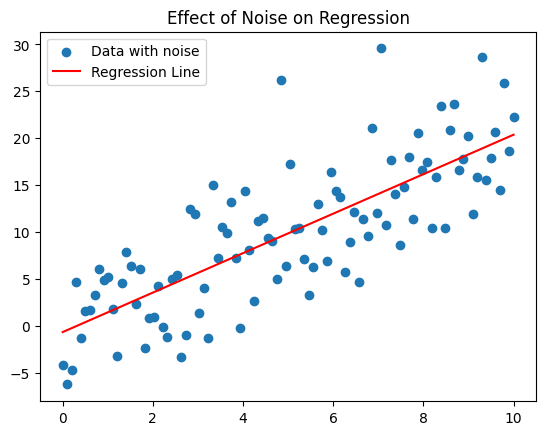

Slope: [2.10557978]
Intercept: [-0.68452338]
MSE: 23.643194611205413
R-squared: 0.614524367241807
New slope estimate: [5.00261551]
Effect of different X range - Slope: [2.02712126]
Small dataset - R-squared: 0.9702523315899867
Large dataset - R-squared: 0.971196523028967


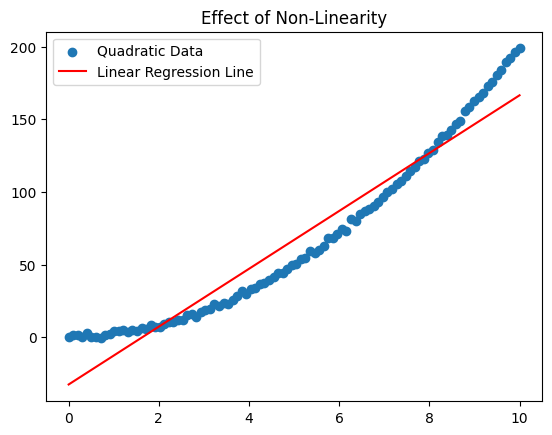

R-squared for non-linear data: 0.9341644309460563
R-squared with multiple independent variables: 0.850562709988032
Regression with categorical variables - Coefficients: [7873.24866422  -50.41761921 1036.2687842  1684.07994714 1299.40122988
 1398.55621526]
Performance with normalization - R-squared: 0.856762135617435


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Function to generate synthetic data
def generate_data(noise=1.0, slope=2.0, x_range=(0, 10), num_points=100, non_linear=False):
    X = np.linspace(x_range[0], x_range[1], num_points).reshape(-1, 1)
    if non_linear:
        y = slope * (X ** 2) + np.random.normal(0, noise, size=X.shape)
    else:
        y = slope * X + np.random.normal(0, noise, size=X.shape)
    return X, y

# 1. Effect of noise on regression
X, y = generate_data(noise=5.0)
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y, label="Data with noise")
plt.plot(X, y_pred, color='red', label="Regression Line")
plt.legend()
plt.title("Effect of Noise on Regression")
plt.show()

print("Slope:", model.coef_[0])
print("Intercept:", model.intercept_)
print("MSE:", mean_squared_error(y, y_pred))
print("R-squared:", r2_score(y, y_pred))

# 2. Changing the slope of the original function
X, y = generate_data(slope=5.0)
model.fit(X, y)
print("New slope estimate:", model.coef_[0])

# 3. Using different range for X values
X, y = generate_data(x_range=(-5, 5))
model.fit(X, y)
y_pred = model.predict(X)
print("Effect of different X range - Slope:", model.coef_[0])

# 4. Impact of using more/fewer data points
X_small, y_small = generate_data(num_points=10)
model.fit(X_small, y_small)
print("Small dataset - R-squared:", r2_score(y_small, model.predict(X_small)))

X_large, y_large = generate_data(num_points=1000)
model.fit(X_large, y_large)
print("Large dataset - R-squared:", r2_score(y_large, model.predict(X_large)))

# 5. Non-linear relationship
X, y = generate_data(non_linear=True)
model.fit(X, y)
y_pred = model.predict(X)
plt.scatter(X, y, label="Quadratic Data")
plt.plot(X, y_pred, color='red', label="Linear Regression Line")
plt.legend()
plt.title("Effect of Non-Linearity")
plt.show()
print("R-squared for non-linear data:", r2_score(y, y_pred))
# Practice Task 2: Linear Regression with External Dataset
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv')
# The 'cut' column needs to be included for creating dummies later
df = df[['carat', 'depth', 'price', 'cut']].dropna() # Include 'cut' column here

X = df[['carat', 'depth']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R-squared with multiple independent variables:", r2_score(y_test, y_pred))

# Handling categorical variables
df = pd.get_dummies(df, columns=['cut'], drop_first=True) # Now 'cut' is available
X = df.drop(columns=['price'])
y = df['price']
model.fit(X, y)
print("Regression with categorical variables - Coefficients:", model.coef_)

# Normalizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model.fit(X_scaled, y)
y_pred = model.predict(X_scaled)
print("Performance with normalization - R-squared:", r2_score(y, y_pred))


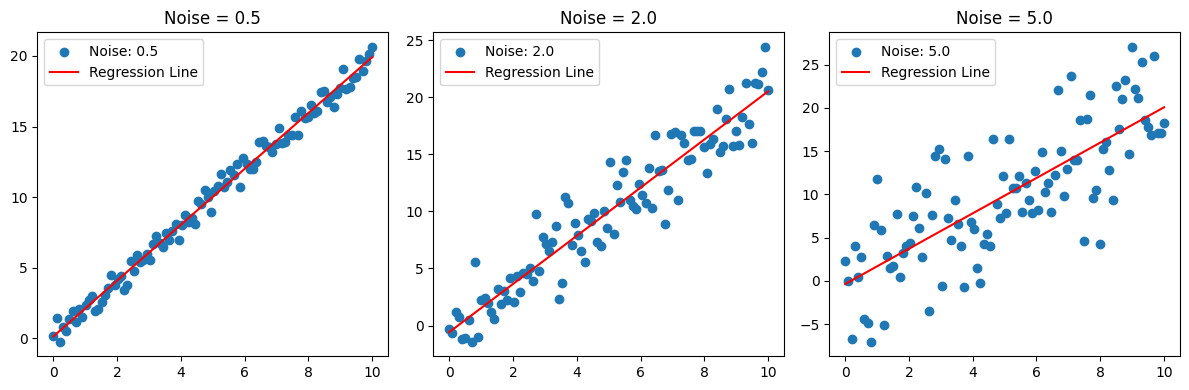

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Function to generate synthetic data with adjustable noise
def generate_data(noise=1.0, slope=2.0, num_points=100):
    X = np.linspace(0, 10, num_points).reshape(-1, 1)
    y = slope * X + np.random.normal(0, noise, size=X.shape)
    return X, y

# Increasing and decreasing noise levels
noise_levels = [0.5, 2.0, 5.0]
plt.figure(figsize=(12, 4))

for i, noise in enumerate(noise_levels, 1):
    X, y = generate_data(noise=noise)
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    plt.subplot(1, 3, i)
    plt.scatter(X, y, label=f"Noise: {noise}")
    plt.plot(X, y_pred, color='red', label="Regression Line")
    plt.legend()
    plt.title(f"Noise = {noise}")

plt.tight_layout()
plt.show()


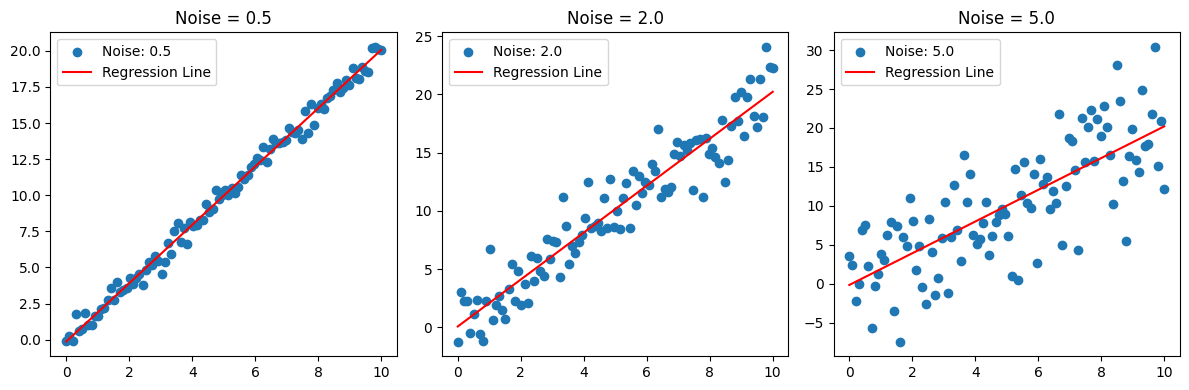

Study Hours (X)     Scores (Y)
------------------------------
1                   50
2                   55
3                   60
4                   65
5                   70
6                   75
7                   80
8                   85
9                   90
10                  95


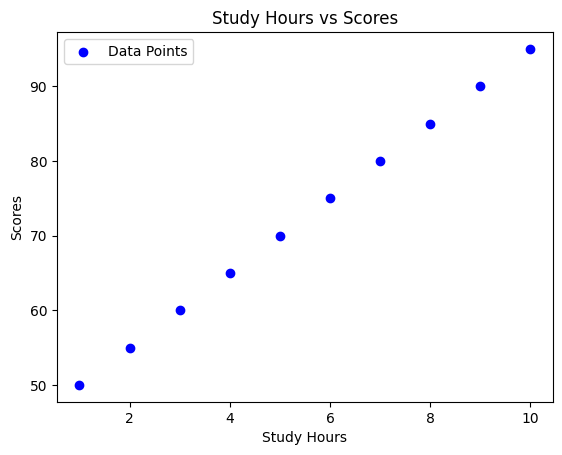

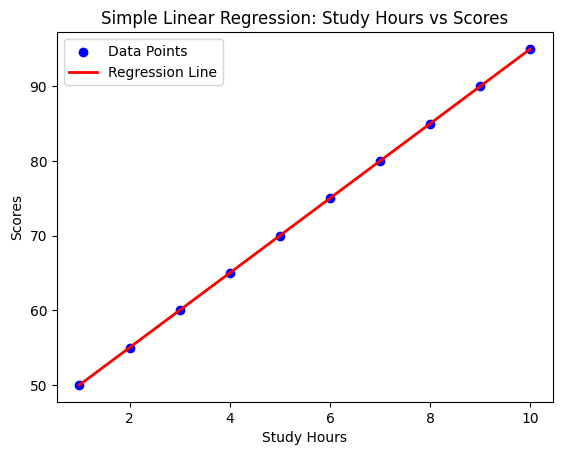

Mean Squared Error (MSE): 4.543838814073028e-29
R-squared: 1.0


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Function to generate synthetic data with adjustable noise
def generate_data(noise=1.0, slope=2.0, num_points=100):
    X = np.linspace(0, 10, num_points).reshape(-1, 1)
    y = slope * X + np.random.normal(0, noise, size=X.shape)
    return X, y

# Increasing and decreasing noise levels
noise_levels = [0.5, 2.0, 5.0]
plt.figure(figsize=(12, 4))

for i, noise in enumerate(noise_levels, 1):
    X, y = generate_data(noise=noise)
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    plt.subplot(1, 3, i)
    plt.scatter(X, y, label=f"Noise: {noise}")
    plt.plot(X, y_pred, color='red', label="Regression Line")
    plt.legend()
    plt.title(f"Noise = {noise}")

plt.tight_layout()
plt.show()

# Study Hours vs Scores dataset
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])  # Study hours (X)
Y = np.array([50, 55, 60, 65, 70, 75, 80, 85, 90, 95])  # Scores (Y)

# Print the dataset in tabular format
print(f"{'Study Hours (X)':<20}{'Scores (Y)'}")
print("-" * 30)
for x, y in zip(X.flatten(), Y):
    print(f"{x:<20}{y}")

# Visualize the dataset
plt.scatter(X, Y, color="blue", label="Data Points")
plt.xlabel("Study Hours")
plt.ylabel("Scores")
plt.title("Study Hours vs Scores")
plt.legend()
plt.show()

# Train the Simple Linear Regression model
model = LinearRegression()
model.fit(X, Y)

# Make predictions
Y_pred = model.predict(X)

# Visualize the regression line
plt.scatter(X, Y, color="blue", label="Data Points")
plt.plot(X, Y_pred, color="red", linewidth=2, label="Regression Line")
plt.xlabel("Study Hours")
plt.ylabel("Scores")
plt.title("Simple Linear Regression: Study Hours vs Scores")
plt.legend()
plt.show()

# Evaluate the model
mse = mean_squared_error(Y, Y_pred)
r2 = r2_score(Y, Y_pred)

# Print the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")


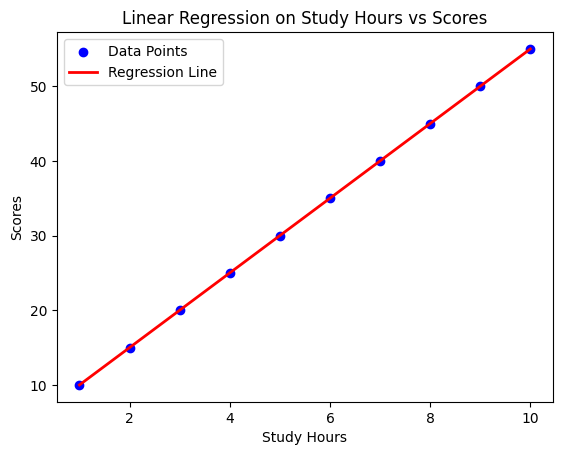

R-squared with Multiple Variables: 1.0
R-squared using single feature: 1.0
R-squared using multiple features: 1.0
R-squared with Categorical Variables: 1.0
R-squared with Normalized Data: 1.0
Practice Task 2 Completed.


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# Define the plot_results function
def plot_results(X, Y, Y_pred, title):
    """
    Plots the original data points and the regression line.

    Args:
        X: The independent variable data.
        Y: The dependent variable data.
        Y_pred: The predicted values.
        title: The title of the plot.
    """
    plt.scatter(X, Y, color="blue", label="Data Points")
    plt.plot(X, Y_pred, color="red", linewidth=2, label="Regression Line")
    plt.xlabel("Study Hours")
    plt.ylabel("Scores")
    plt.title(title)
    plt.legend()
    plt.show()


# 1. Apply Linear Regression
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)
plot_results(X, Y, Y_pred, "Linear Regression on Study Hours vs Scores")

# 2. Multiple Independent Variables
X_multi = np.column_stack((X, X**2))  # Example: Adding a quadratic term
model.fit(X_multi, Y)
Y_pred_multi = model.predict(X_multi)
print("R-squared with Multiple Variables:", r2_score(Y, Y_pred_multi))

# 3. Evaluate Model Performance using R-squared
print("R-squared using single feature:", r2_score(Y, Y_pred))
print("R-squared using multiple features:", r2_score(Y, Y_pred_multi))

# 4. Categorical Variables
# Example: Simulating categorical variable (e.g., pass/fail)
categories = np.array(["Fail" if score < 75 else "Pass" for score in Y]).reshape(-1, 1)
encoder = OneHotEncoder(drop='first')  # handle_unknown='ignore' if needed
categorical_encoded = encoder.fit_transform(categories).toarray()
X_with_cat = np.hstack((X, categorical_encoded))

model.fit(X_with_cat, Y)
Y_pred_cat = model.predict(X_with_cat)
print("R-squared with Categorical Variables:", r2_score(Y, Y_pred_cat))

# 5. Normalization Impact
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_multi)
model.fit(X_scaled, Y)
Y_pred_scaled = model.predict(X_scaled)
print("R-squared with Normalized Data:", r2_score(Y, Y_pred_scaled))

print("Practice Task 2 Completed.")